<a href="https://colab.research.google.com/github/ojan9976/kinerja_siswa/blob/main/kinerja_siswa_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files


In [ ]:
# 2. Upload file Excel
uploaded = files.upload()  # Pilih file "dataset.xlsx"


Saving dataset.xlsx to dataset (3).xlsx


In [ ]:
# 3. Baca file dan pilih kolom
# Sesuaikan header jika perlu
df = pd.read_excel("dataset.xlsx", header=4)

# Kolom identitas dan nilai
kolom_identitas = ['No', 'Nama', 'Kelas']
kolom_nilai = ['TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07', 'TP08']

# Hapus baris kosong
df = df[kolom_identitas + kolom_nilai].dropna()


In [ ]:
# 4. Normalisasi kolom nilai
scaler = StandardScaler()
nilai_scaled = scaler.fit_transform(df[kolom_nilai])


In [ ]:
# 5. KMeans clustering dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(nilai_scaled)

# 6. Hitung silhouette score
score = silhouette_score(nilai_scaled, df['Cluster'])
print(f"Silhouette Score untuk 3 Cluster: {score:.4f}")


Silhouette Score untuk 3 Cluster: 0.2722


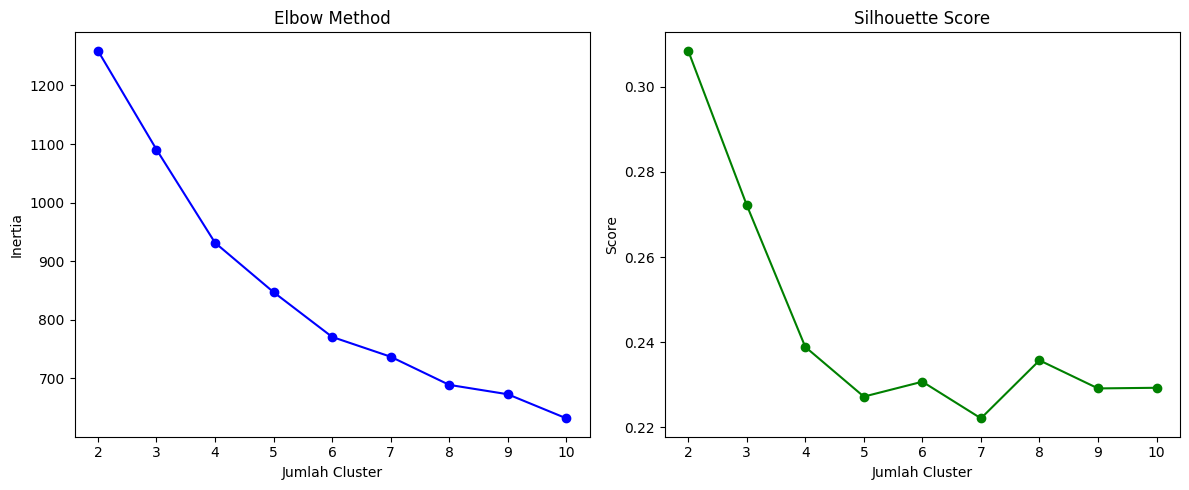

In [ ]:
inertias = []
silhouette_scores = []
range_n = range(2, 11)

for n in range_n:
    kmeans_n = KMeans(n_clusters=n, random_state=42)
    labels = kmeans_n.fit_predict(nilai_scaled)
    inertias.append(kmeans_n.inertia_)
    silhouette_scores.append(silhouette_score(nilai_scaled, labels))

# Plot Elbow & Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n, inertias, 'bo-')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range_n, silhouette_scores, 'go-')
plt.title("Silhouette Score")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


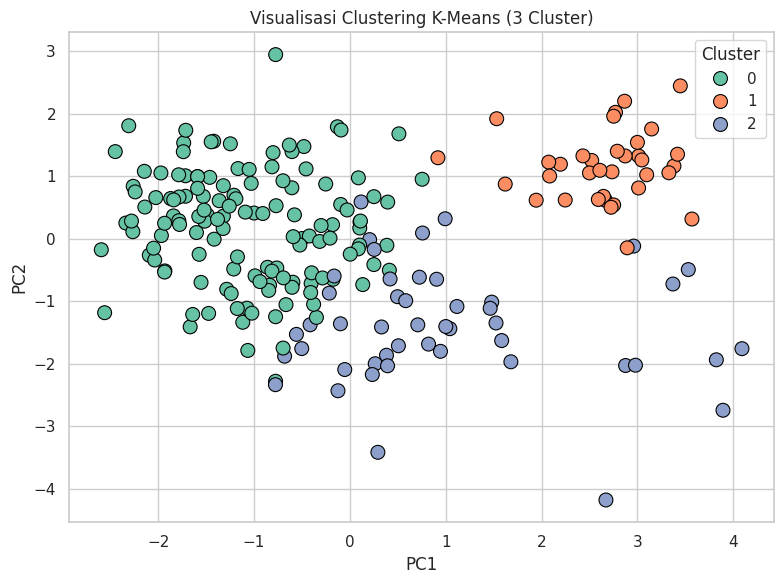

In [ ]:
# 7. PCA untuk reduksi dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nilai_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# 8. Visualisasi cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, edgecolor='black')
plt.title("Visualisasi Clustering K-Means (3 Cluster)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


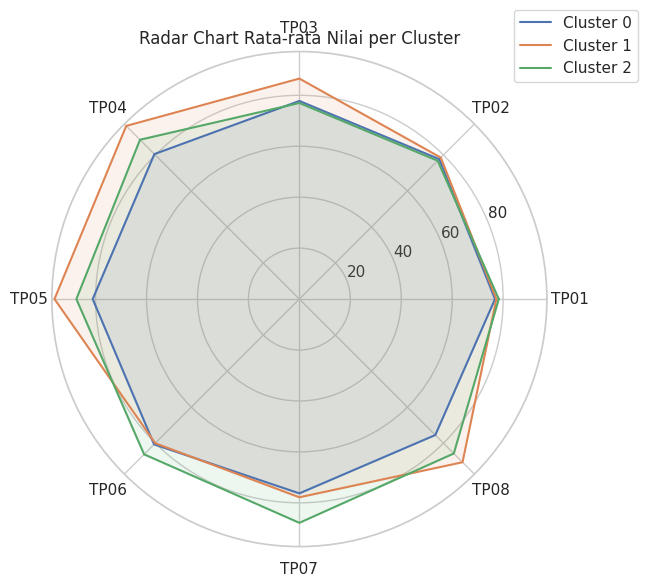

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Misalkan dataframe Anda bernama df dan sudah ada kolom 'Cluster'
# Misalkan kolom nilainya adalah TP01 s.d TP08
kolom_nilai = ['TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07', 'TP08']

# Hitung rata-rata tiap cluster
df_cluster_mean = df.groupby('Cluster')[kolom_nilai].mean()

# Siapkan data untuk radar chart
labels = np.array(kolom_nilai)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Menutup lingkaran

# Plot
plt.figure(figsize=(8, 6))
plt.subplot(polar=True)

for idx, row in df_cluster_mean.iterrows():
    values = row.tolist()
    values += values[:1]  # Tutup lingkaran
    plt.plot(angles, values, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.1)

# Label dan tampilan
plt.xticks(angles[:-1], labels)
plt.title('Radar Chart Rata-rata Nilai per Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


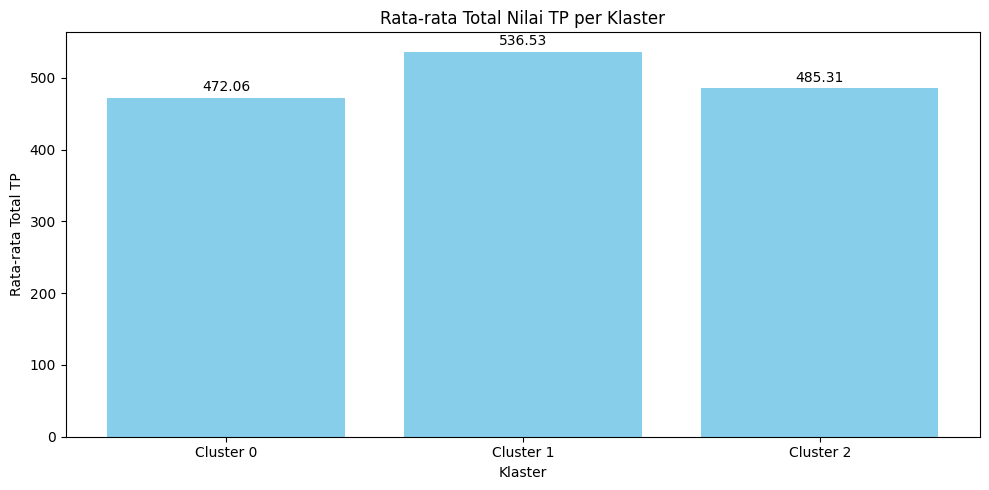

In [2]:
# Bar chart rata-rata total TP per klaster
klaster = ['Cluster 0', 'Cluster 1', 'Cluster 2']
rata_rata_tp = [472.06, 536.53, 485.31]

plt.figure(figsize=(10, 5))
bars = plt.bar(klaster, rata_rata_tp, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Rata-rata Total Nilai TP per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Rata-rata Total TP')
plt.tight_layout()
plt.show()
